In [1]:
from pandas import Series, DataFrame 
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('C-new_sensor.csv')
df.head()

Date          Time  ErrorCode  TransmitterCount  Rpm  PulseType  \
0  2018-04-28  13:03:04:216          0             59485  900          1   
1  2018-04-28  13:03:04:224          0             59486  900          1   
2  2018-04-28  13:03:04:228          0             59487  900          1   
3  2018-04-28  13:03:04:236          0             59488  900          1   
4  2018-04-28  13:03:04:240          0             59489  900          1   

   Temp  ScanDataCount  LeftRight  FrontStartAngle      ...        \
0    30            180          0               30      ...         
1    30            180          1               40      ...         
2    30            180          0               30      ...         
3    30            180          1               40      ...         
4    30            180          0               30      ...         

   R_Angle.178  RearDist.178  RearLevel.178  IndexData.179  F_Angle.179  \
0        14370         65000              1            180        14350   
1        14380         65000              1            180        14360   
2        14370         65000              1            180        14350   
3        14380         65000              1            180        14360   
4        14370         65000              1            180        14350   

   FrontDist.179  FrontLevel.179  R_Angle.179  RearDist.179  RearLevel.179  
0          65000               1        14450         65000              1  
1          65000               1        14460         65000              1  
2          65000               1        14450         65000              1  
3          65000               1        14460         65000              1  
4          65000               1        14450         65000              1  

[5 rows x 1274 columns]

관심있는 컬럼만 뽑아서 데이터프레임을 다시 생성한다.
각도 데이터는 IndexData.1, Angle.1, FrontDist.1, FrontLevel.1, RearDist.1, RearLevel.1와 같이 자동으로 컬럼 이름끝에 구분 인덱스 번호가 1부터 부여된다.
커럼 갯수는 202개만 우선 추출한다.

In [3]:
df2 = df[df['LeftRight'] == 0]
print('df.count={} df2.count={}'.format(len(df), len(df2)))

df.count=258 df2.count=129


In [4]:
df2.head()

Date          Time  ErrorCode  TransmitterCount  Rpm  PulseType  \
0  2018-04-28  13:03:04:216          0             59485  900          1   
2  2018-04-28  13:03:04:228          0             59487  900          1   
4  2018-04-28  13:03:04:240          0             59489  900          1   
6  2018-04-28  13:03:04:252          0             59491  900          1   
8  2018-04-28  13:03:04:272          0             59493  900          1   

   Temp  ScanDataCount  LeftRight  FrontStartAngle      ...        \
0    30            180          0               30      ...         
2    30            180          0               30      ...         
4    30            180          0               30      ...         
6    30            180          0               30      ...         
8    30            180          0               30      ...         

   R_Angle.178  RearDist.178  RearLevel.178  IndexData.179  F_Angle.179  \
0        14370         65000              1            180        14350   
2        14370         65000              1            180        14350   
4        14370         65000              1            180        14350   
6        14370         65000              1            180        14350   
8        14370         65000              1            180        14350   

   FrontDist.179  FrontLevel.179  R_Angle.179  RearDist.179  RearLevel.179  
0          65000               1        14450         65000              1  
2          65000               1        14450         65000              1  
4          65000               1        14450         65000              1  
6          65000               1        14450         65000              1  
8          65000               1        14450         65000              1  

[5 rows x 1274 columns]

In [5]:
columns = ['Time', 'ScanDataCount']
for n in range(1, 180):
    columns.append('R_Angle.%d' % n)
    columns.append('RearDist.%d' % n)
df3 = df2[columns]
df3.head()

Time  ScanDataCount  R_Angle.1  RearDist.1  R_Angle.2  RearDist.2  \
0  13:03:04:216            180        210       65000        290       65000   
2  13:03:04:228            180        210       65000        290       65000   
4  13:03:04:240            180        210       65000        290       65000   
6  13:03:04:252            180        210       65000        290       65000   
8  13:03:04:272            180        210       65000        290       65000   

   R_Angle.3  RearDist.3  R_Angle.4  RearDist.4      ...       R_Angle.175  \
0        370       65000        450       65000      ...             14130   
2        370       65000        450       65000      ...             14130   
4        370       65000        450       65000      ...             14130   
6        370       65000        450       65000      ...             14130   
8        370       65000        450       65000      ...             14130   

   RearDist.175  R_Angle.176  RearDist.176  R_Angle.177  RearDist.177  \
0         65000        14210         65000        14290         65000   
2         65000        14210         65000        14290         65000   
4         65000        14210         65000        14290         65000   
6         65000        14210         65000        14290         65000   
8         65000        14210         65000        14290         65000   

   R_Angle.178  RearDist.178  R_Angle.179  RearDist.179  
0        14370         65000        14450         65000  
2        14370         65000        14450         65000  
4        14370         65000        14450         65000  
6        14370         65000        14450         65000  
8        14370         65000        14450         65000  

[5 rows x 360 columns]

In [6]:
df3.iloc[0].head()

Time             13:03:04:216
ScanDataCount             180
R_Angle.1                 210
RearDist.1              65000
R_Angle.2                 290
Name: 0, dtype: object

65000 값을 NaN으로 변경

In [15]:
df4 = df3.copy()
for c in df4.columns:
    df4[c] = df4[c].replace(65000, np.NaN)

도표로 출력하기 위해 Angle과 distance 값을 뽑음

In [16]:
def angles_and_distances(row_serial):
    angles = list()
    distances = list()
    for idx in row_serial.index:
        if 'R_Angle.' in idx:
            angles.append(row_serial[idx])
        if 'RearDist.' in idx:
            distances.append(row_serial[idx])
    return angles, distances

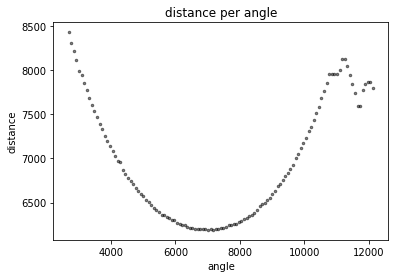

In [18]:
import matplotlib.pyplot as plt
angles, distances = angles_and_distances(df4.iloc[25])
colors = (0,0,0)
area = np.pi*2
plt.scatter(angles, distances, s=area, c=colors, alpha=0.5)
plt.title('distance per angle')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

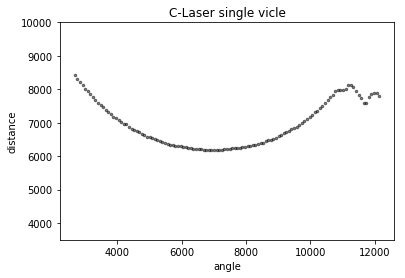

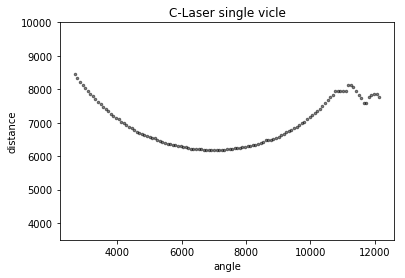

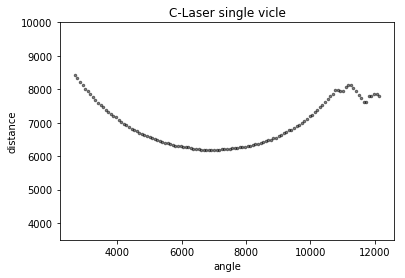

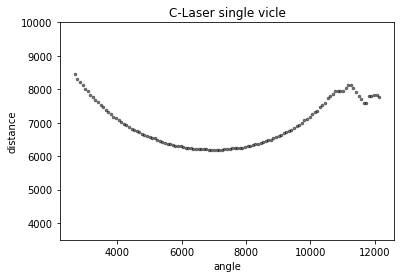

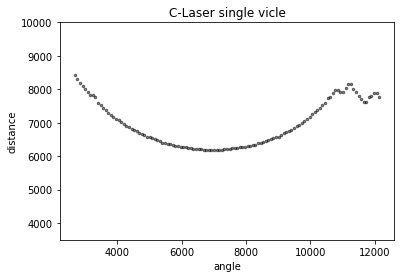

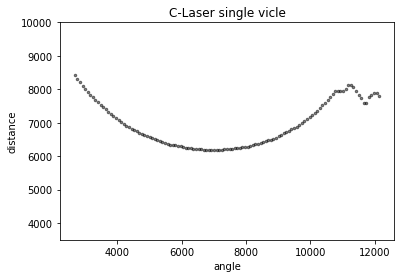

In [19]:
for row in df4.iloc[:6].iterrows():
    angles, distances = angles_and_distances(row[1])
    colors = (0,0,0)
    area = np.pi*2
    plt.scatter(angles, distances, s=area, c=colors, alpha=0.5)
    plt.title('C-Laser single vicle')
    plt.xlabel('angle')
    plt.ylabel('distance')
    #plt.xlim(-2, 2)
    plt.ylim(3500, 10000)
    plt.show()